In [1]:
import convexgating as cg
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import datetime
import os
import re
from pywget import wget
import json

In [2]:
#convexgating==0.1.1 #branch add_parameter_option

In [3]:
pre = 'CyTOF_01_run_gating'
start_time = hr.get_time()
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

path exists


In [4]:
#DOWNLOAD
#link = "https://zenodo.org/record/5771937/files/data_Tcells_annotated.csv.gz"
#wget.download(link, path_input_data)

In [5]:
df_anno = pd.read_csv(os.path.join(path_input_data,"data_Tcells_annotated.csv.gz"), compression='gzip')

In [6]:
var_names = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']
adata_anno = ann.AnnData(X=df_anno[var_names], obs= df_anno[['cellid', 'Run', 'FCS.Filename', 'id', 'Individuals', 'Group',
       'Severity', 'Disease.phase', 'max. WHO scale', 'sev_merge',
       'Days.post.symptom.onset', 'Week', 'sev_week', 'followup', 'Tcellcompartment',
       'pheno_acute', 'metacluster_num', 'metacluster_name', 'new_clust_name',
       'new_clust_num']]) 

df_umap = df_anno[['UMAP1', 'UMAP2']]
df_umap.index = adata_anno.obs_names
adata_anno.obsm['X_umap'] = df_umap.to_numpy()

cofactor = 5
adata_anno.X = adata_anno.X/cofactor
adata_anno.X = np.arcsinh(adata_anno.X)

#----------------------------------------------------------------------------------------
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']

## Joint CITEseq panel

In [7]:
path_joint_panel = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\main_Figure_bridge_gap\\Summary\\output_data\\summary_01\\summary_01_intersect_AB_cytof.json'
with open(path_joint_panel, 'r') as f:
    joint_panel = json.load(f)

In [8]:
joint_panel

['CD3',
 'CCR6',
 'CD8',
 'CD45RO',
 'ICOS',
 'PD1',
 'CD14',
 'CD38',
 'TIGIT',
 'CD15',
 'CXCR3',
 'CXCR5',
 'CD69',
 'CD45',
 'CD56',
 'KLRG1',
 'IgD',
 'CD25',
 'CD19',
 'CD62L',
 'CD96',
 'CD21',
 'CD16',
 'CD123',
 'CD34',
 'CD28',
 'CD226',
 'IgM',
 'CD27']

In [9]:
adata_CV19_joint_panel = adata_CV19[:,joint_panel]
adata_CV19_joint_panel = adata_CV19_joint_panel.copy()

In [10]:
#run convex gating
cluster_string = 'new_clust_num'
subsample_factor = 15

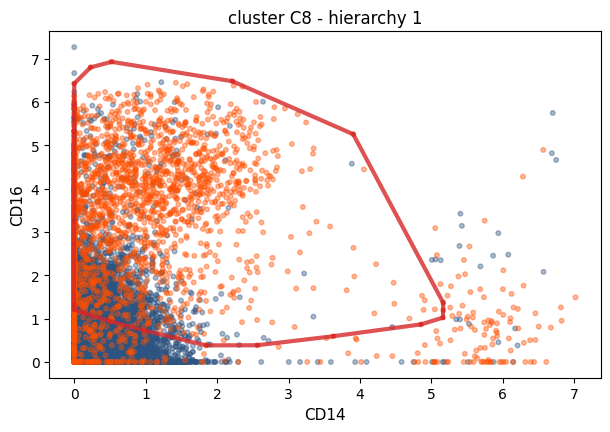

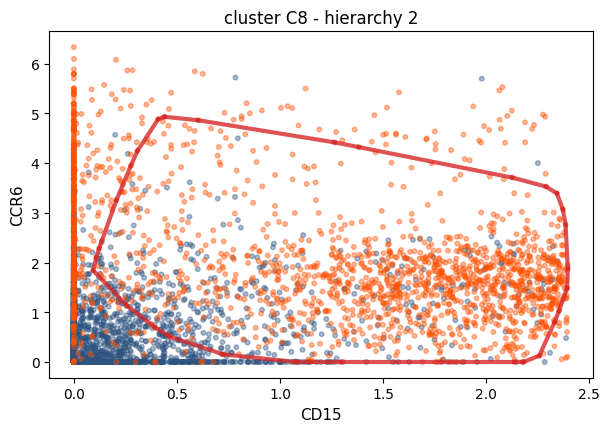

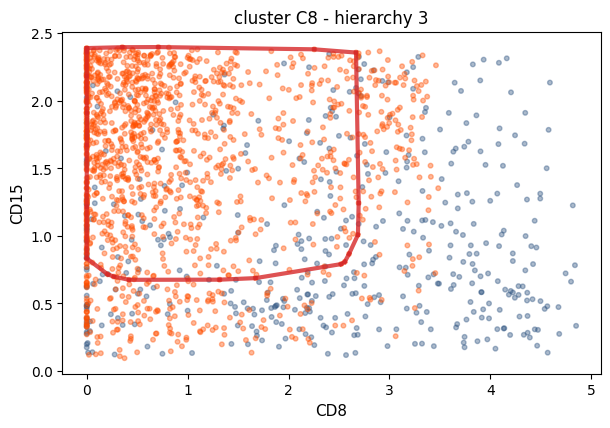

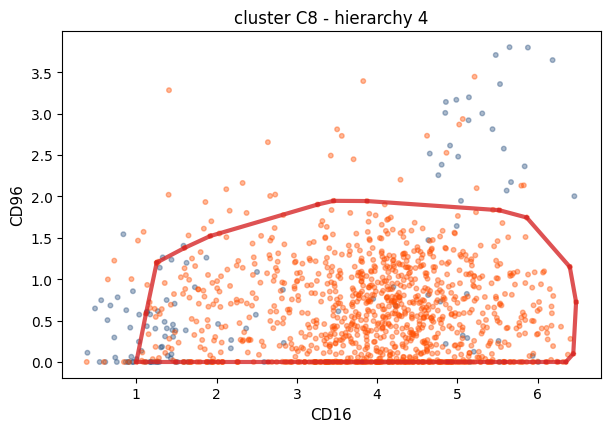

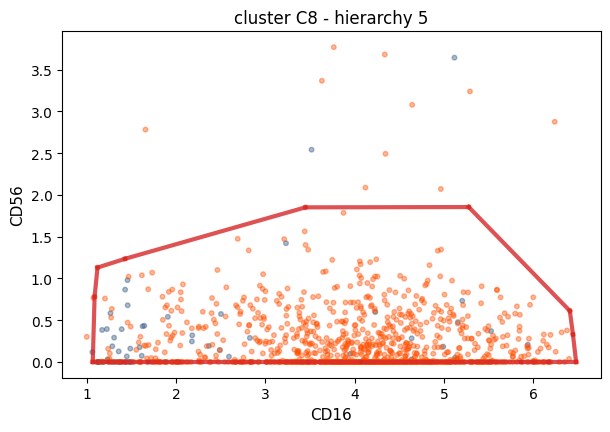

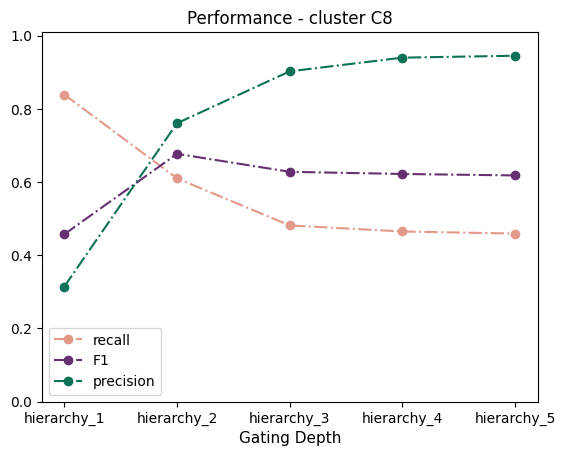

In [11]:
#cluster C8
target_cluster = 'C8'
save = os.path.join(path_output_script,target_cluster + '_joint_panel')
adata_C8_joint_panel = hr.get_subsample_fraction(adata_CV19_joint_panel,cluster_string,target_cluster,subsample_factor)

cg.tools.CONVEX_GATING(adata=adata_C8_joint_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

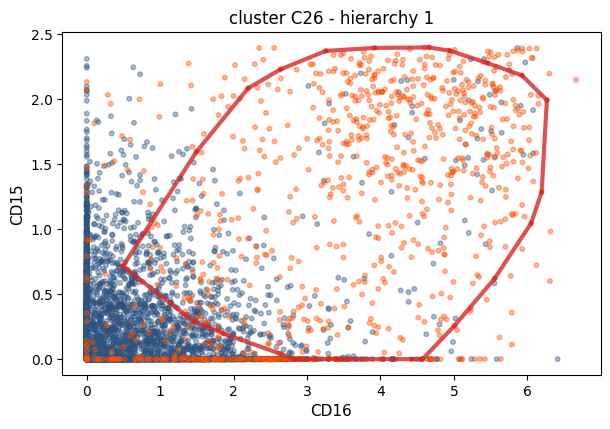

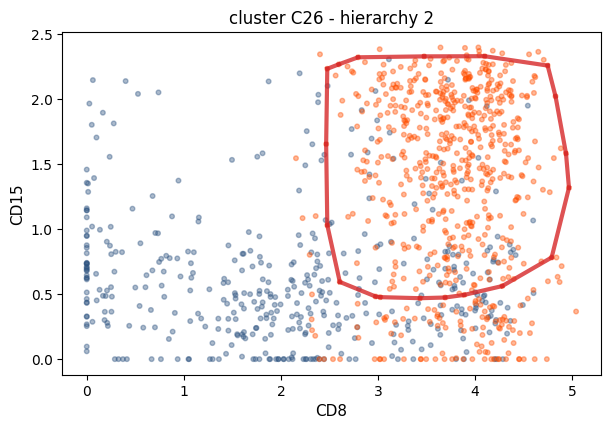

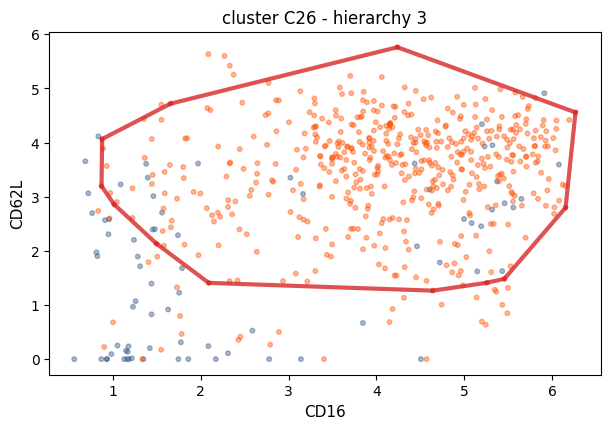

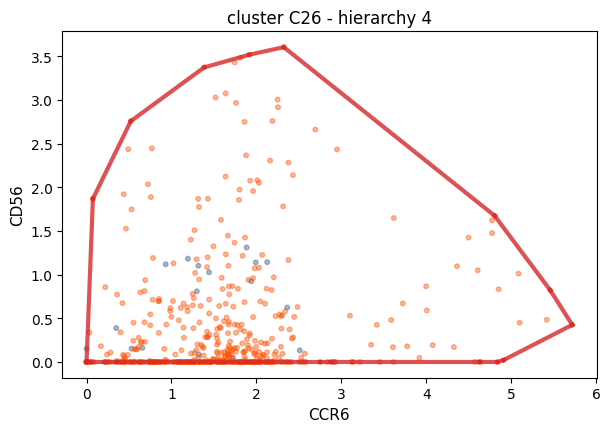

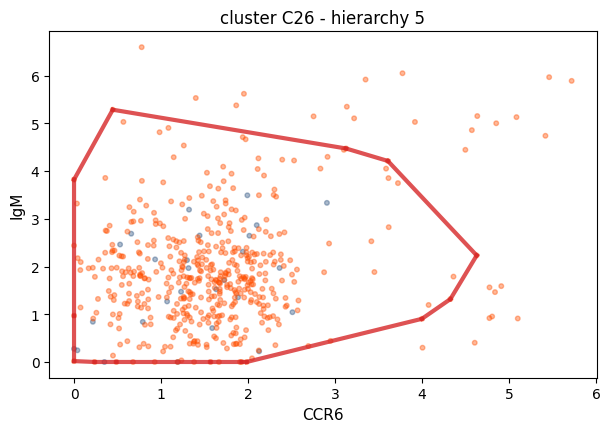

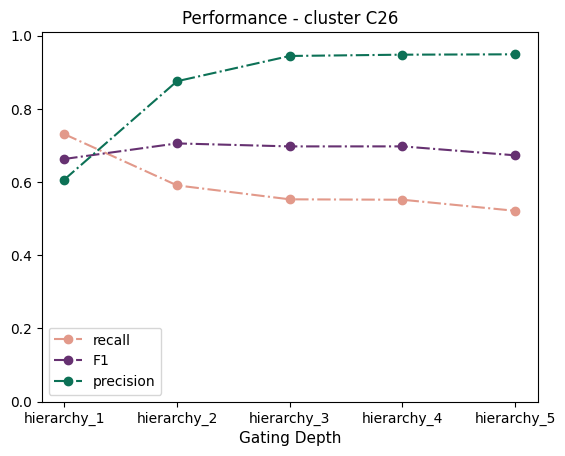

In [12]:
#cluster 26
target_cluster = 'C26'
save = os.path.join(path_output_script,target_cluster + '_joint_panel')
adata_C26_joint_panel = hr.get_subsample_fraction(adata_CV19_joint_panel,cluster_string,target_cluster,subsample_factor)

cg.tools.CONVEX_GATING(adata=adata_C26_joint_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

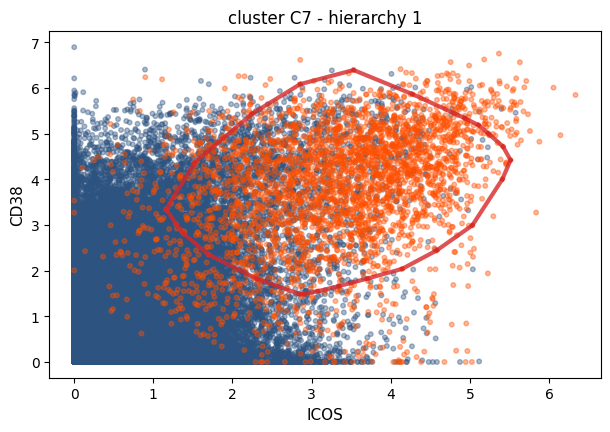

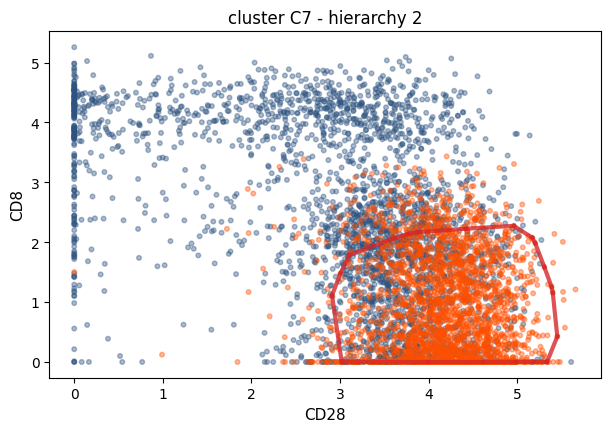

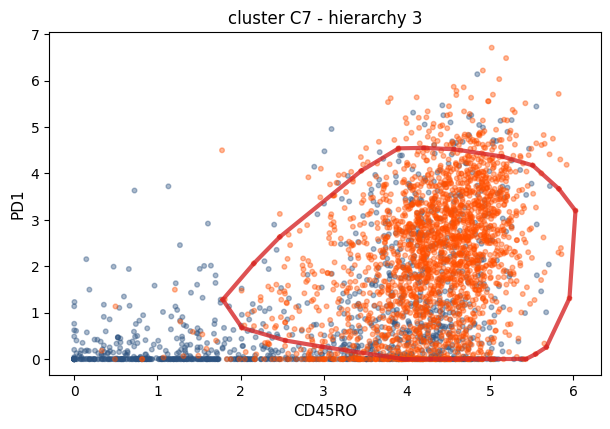

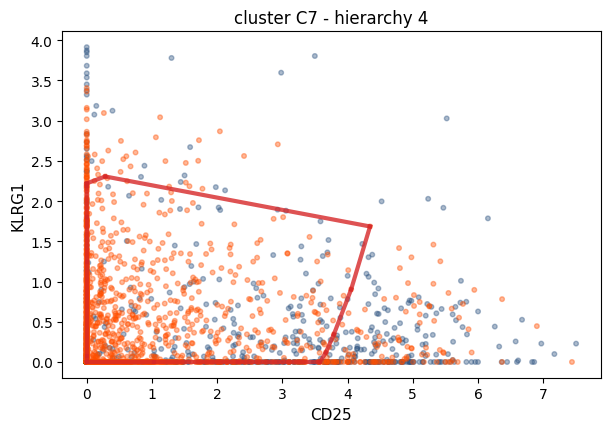

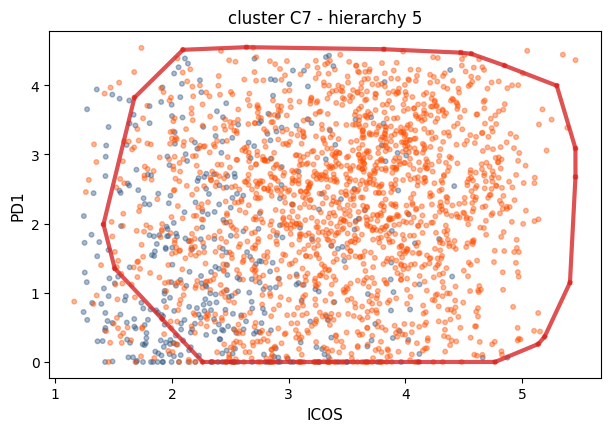

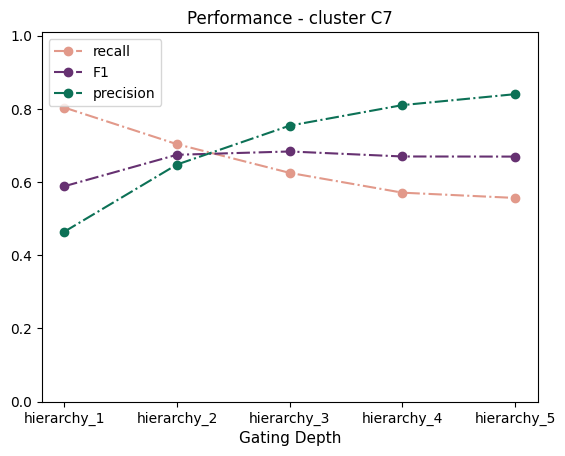

In [13]:
#cluster C7
fraction = 1 / (subsample_factor + 1)
final_obs = 50000
target_cluster = 'C7'
save = os.path.join(path_output_script,target_cluster + '_joint_panel')
adata_C7_joint_panel = hr.get_subsample_fraction_final_obs(adata_CV19_joint_panel,cluster_string,target_cluster,fraction,final_obs)

cg.tools.CONVEX_GATING(adata=adata_C7_joint_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

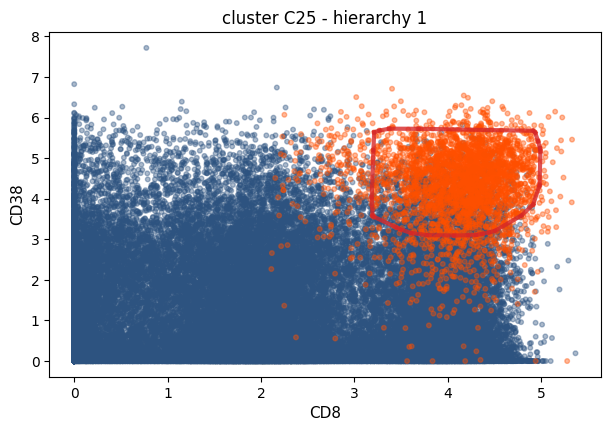

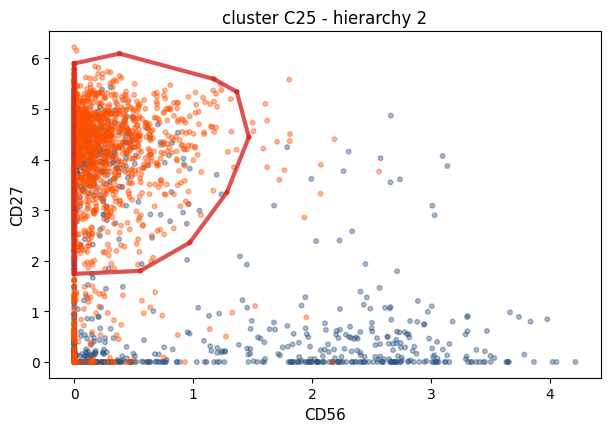

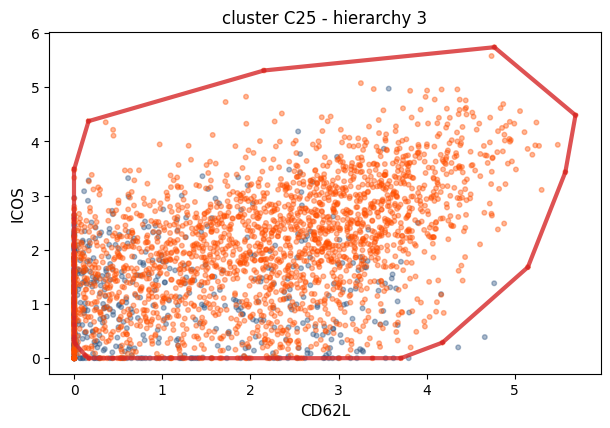

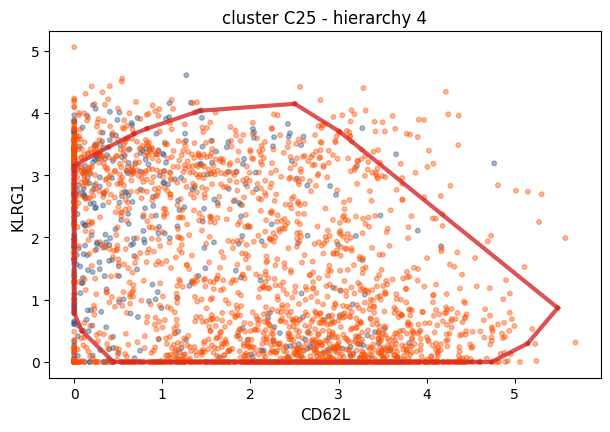

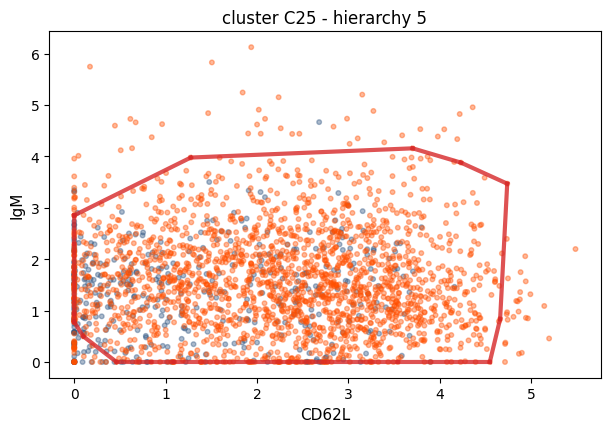

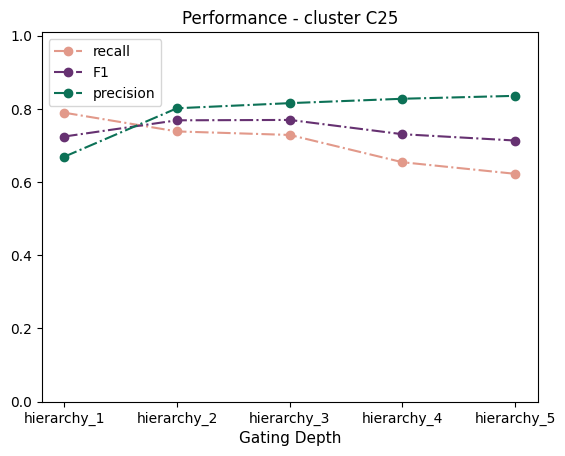

In [14]:
#cluster C25
fraction = 1 / (subsample_factor + 1)
final_obs = 50000
target_cluster = 'C25'
save = os.path.join(path_output_script,target_cluster + '_joint_panel')

adata_C25_joint_panel = hr.get_subsample_fraction_final_obs(adata_CV19_joint_panel,cluster_string,target_cluster,fraction,final_obs)

cg.tools.CONVEX_GATING(adata=adata_C25_joint_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

## Joint FACS panel

In [15]:
path_FACS_panel = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\main_Figure_bridge_gap\\Summary\\output_data\\summary_01\\summary_01_intersect_AB_cytof_FACS.json'
with open(path_FACS_panel, 'r') as f:
    FACS_panel = json.load(f)

In [16]:
FACS_panel

['CD3', 'CD11c', 'CD19', 'CD8', 'CD45', 'CD56', 'CD14', 'CD16']

In [17]:
adata_CV19_FACS_panel = adata_CV19[:,FACS_panel]
adata_CV19_FACS_panel = adata_CV19_FACS_panel.copy()

In [18]:
#run convex gating
cluster_string = 'new_clust_num'
subsample_factor = 15

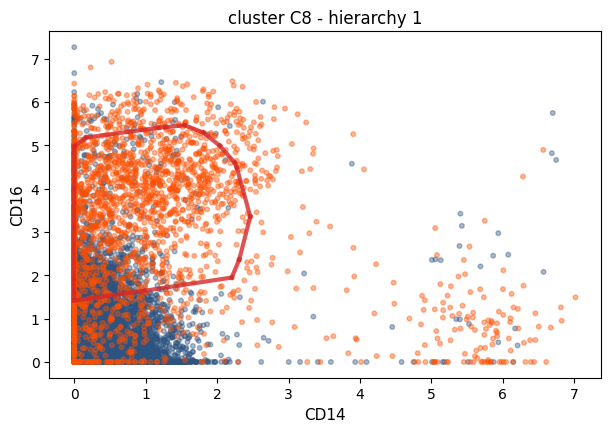

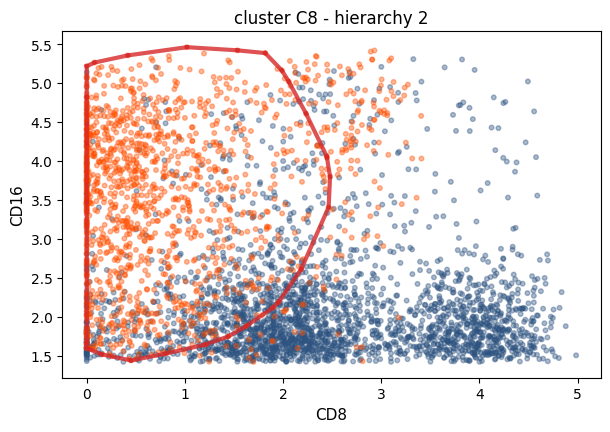

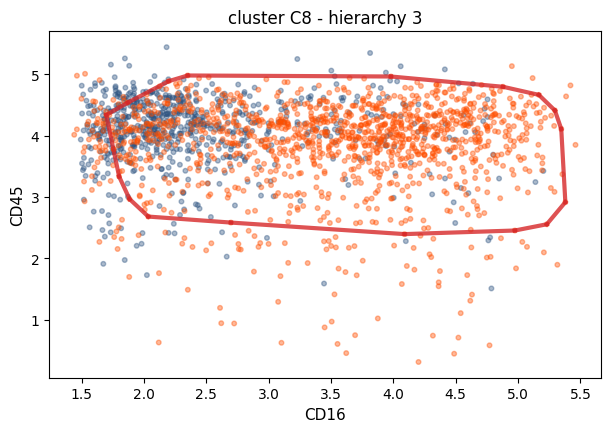

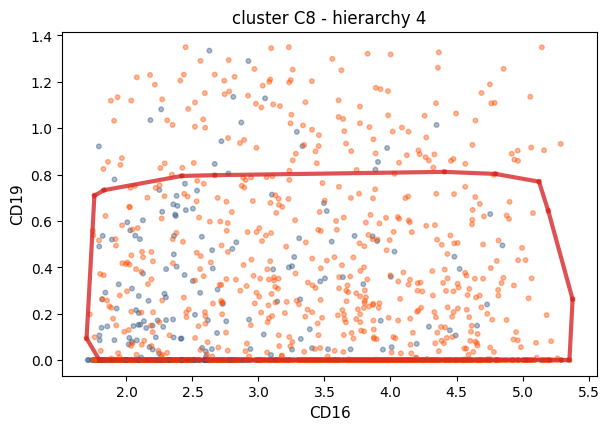

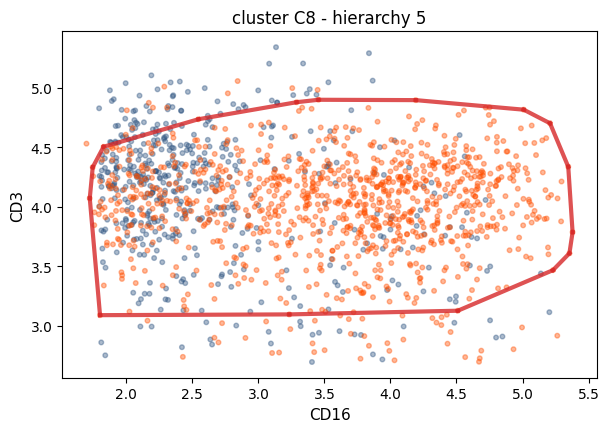

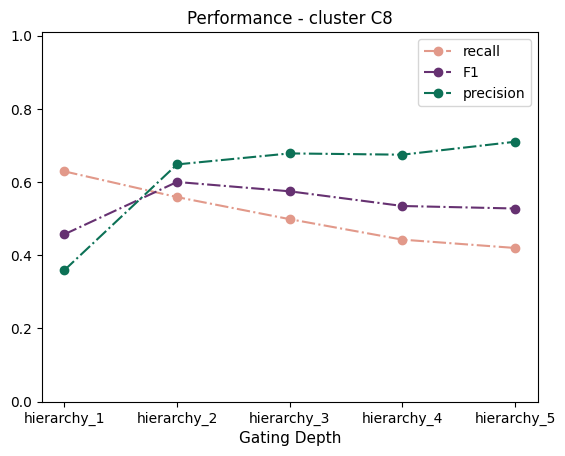

In [19]:
#cluster C8
target_cluster = 'C8'
save = os.path.join(path_output_script,target_cluster + '_FACS_panel')
adata_C8_FACS_panel = hr.get_subsample_fraction(adata_CV19_FACS_panel,cluster_string,target_cluster,subsample_factor)

cg.tools.CONVEX_GATING(adata=adata_C8_FACS_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

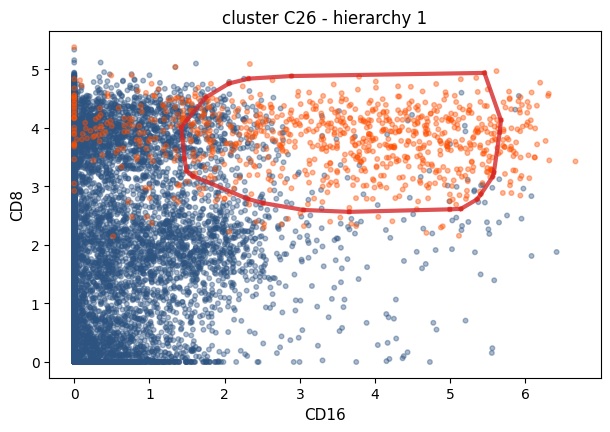

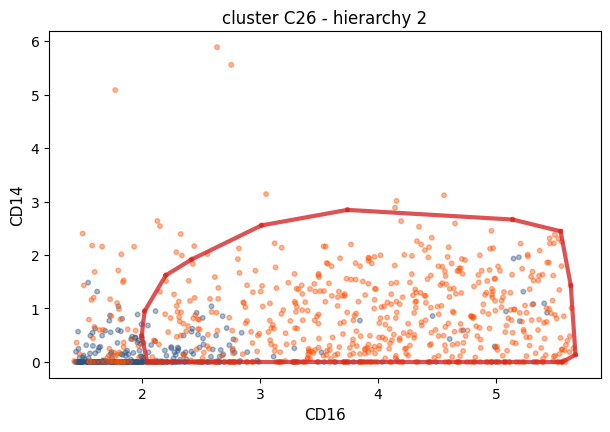

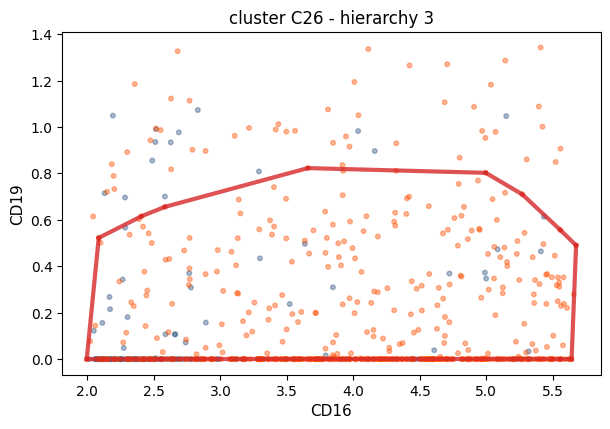

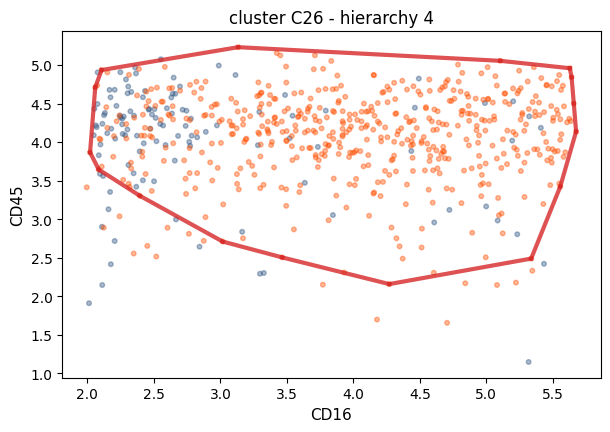

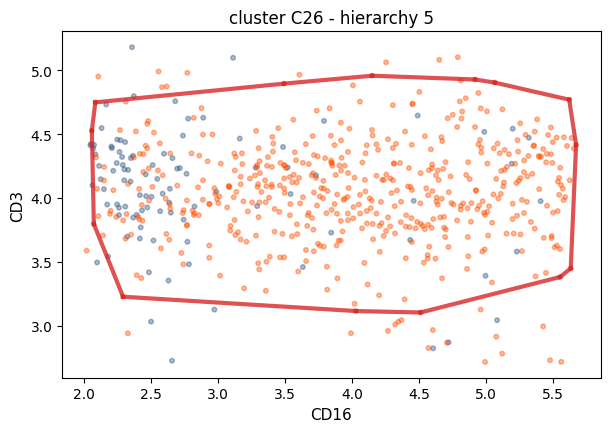

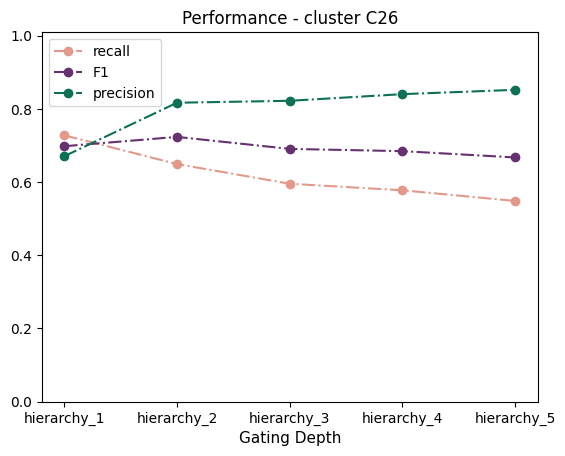

In [20]:
#cluster 26
target_cluster = 'C26'
save = os.path.join(path_output_script,target_cluster + '_FACS_panel')
adata_C26_FACS_panel = hr.get_subsample_fraction(adata_CV19_FACS_panel,cluster_string,target_cluster,subsample_factor)

cg.tools.CONVEX_GATING(adata=adata_C26_FACS_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

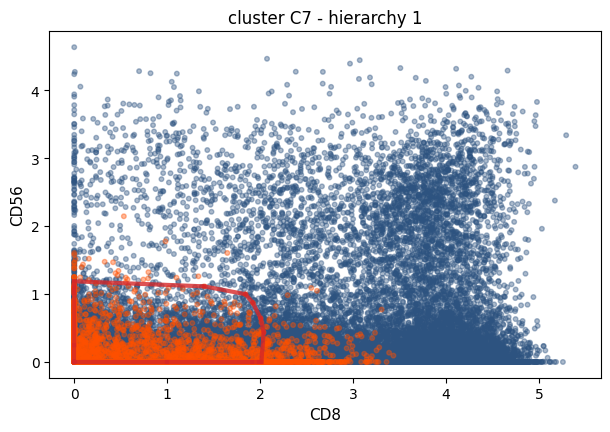

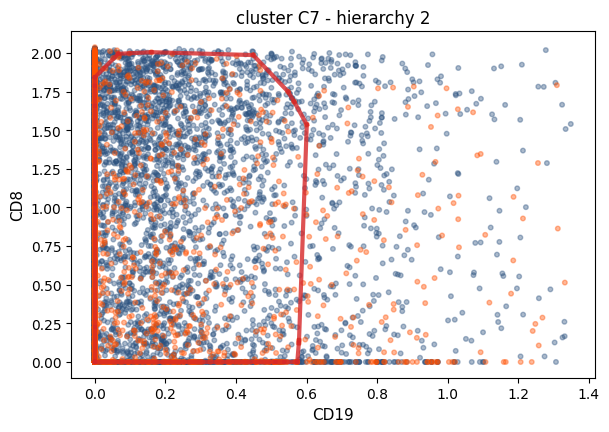

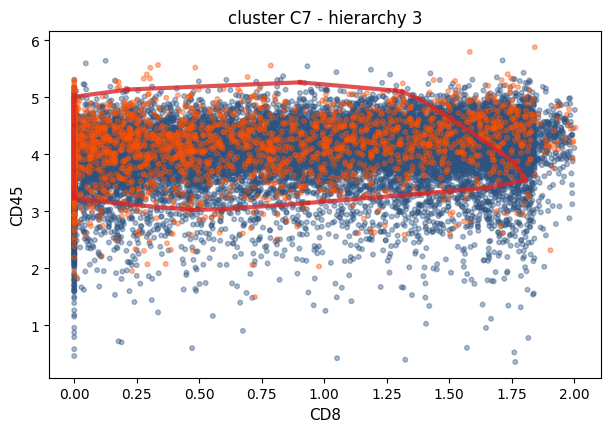

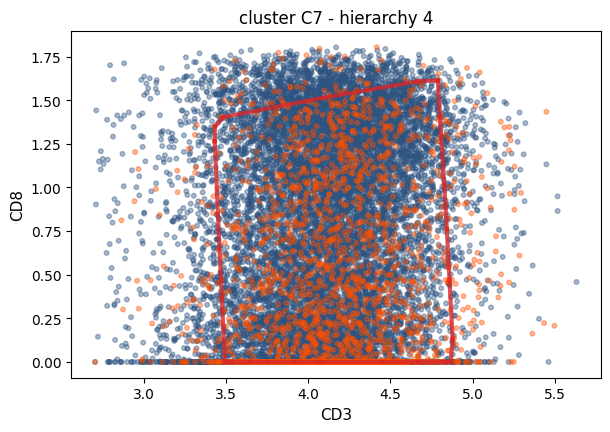

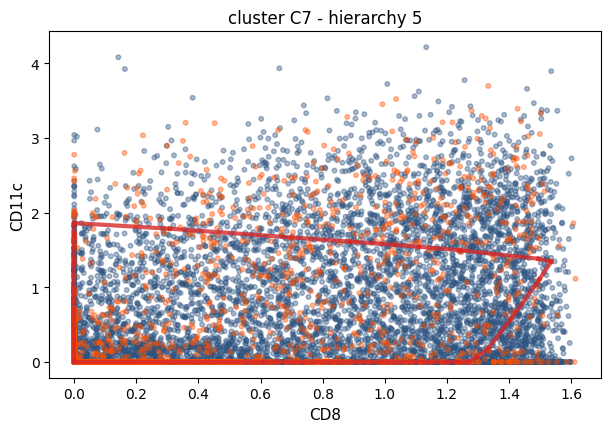

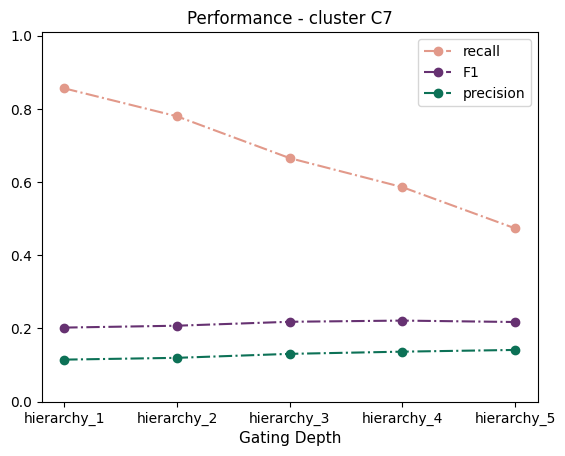

In [21]:
#cluster C7
fraction = 1 / (subsample_factor + 1)
final_obs = 50000
target_cluster = 'C7'
save = os.path.join(path_output_script,target_cluster + '_FACS_panel')
adata_C7_FACS_panel = hr.get_subsample_fraction_final_obs(adata_CV19_FACS_panel,cluster_string,target_cluster,fraction,final_obs)

cg.tools.CONVEX_GATING(adata=adata_C7_FACS_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

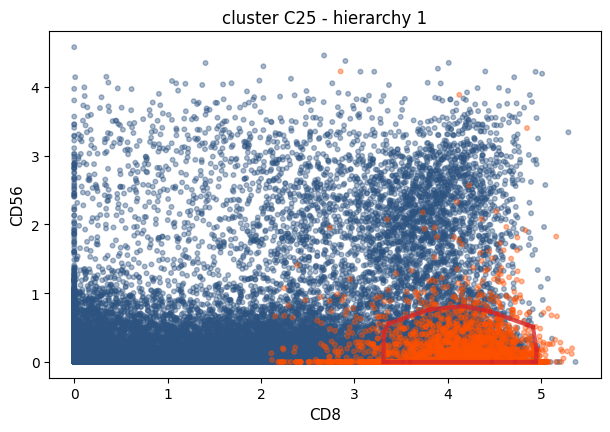

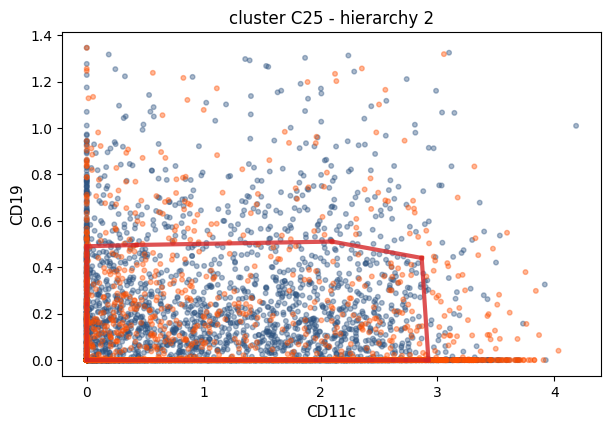

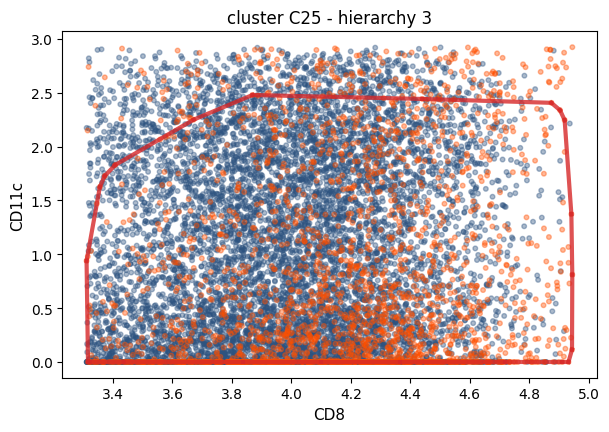

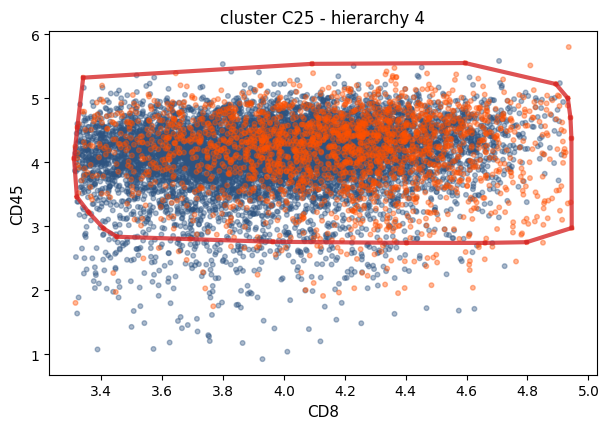

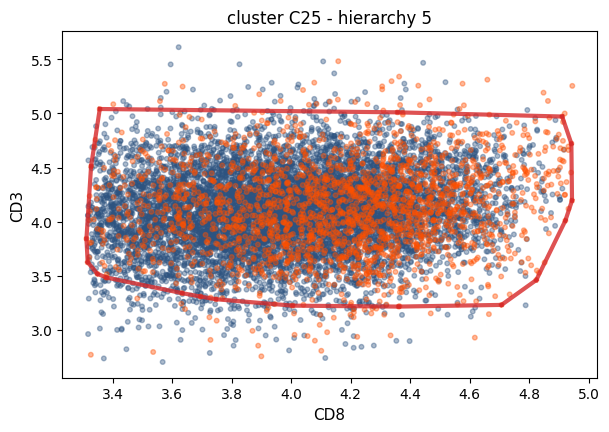

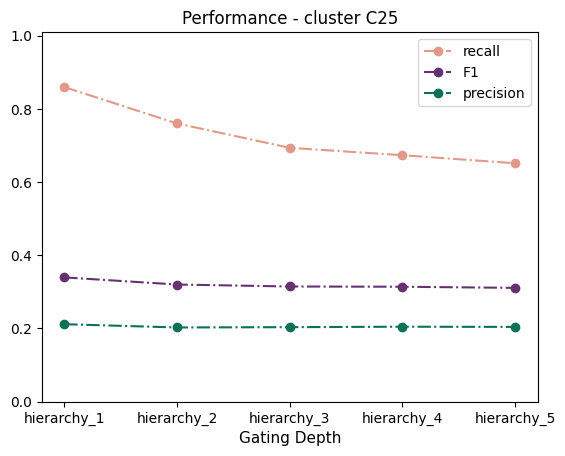

In [22]:
#cluster C25
fraction = 1 / (subsample_factor + 1)
final_obs = 50000
target_cluster = 'C25'
save = os.path.join(path_output_script,target_cluster + '_FACS_panel')

adata_C25_FACS_panel = hr.get_subsample_fraction_final_obs(adata_CV19_FACS_panel,cluster_string,target_cluster,fraction,final_obs)

cg.tools.CONVEX_GATING(adata=adata_C25_FACS_panel,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

## Save session

In [23]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=1011, microseconds=569915)